### Descriptive Statistics:
 - Obtain basic statistics for textual lengths (like headline length).
 - Count the number of articles per publisher to identify which publishers are most active.
 - Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import sys

In [78]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [79]:
# Reading file from Data folder
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

In [80]:
# Checking the first ten records
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [81]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [82]:
# 1. Descriptive Statistics on Headline Length
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


# 1. Descriptive Statistics on Headline Length

In [93]:
# Obtain basic statistics for textual lengths (like headline length).
df["headline_length"] = df["headline"].apply(len)

df.head()
# Count the number of articles per publisher to identify which publishers are most active.


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,Sentiment_Scores,Sentiment,Sentiment_Category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.296,Positive


 # 2. Article Count per Publisher

In [94]:

publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64


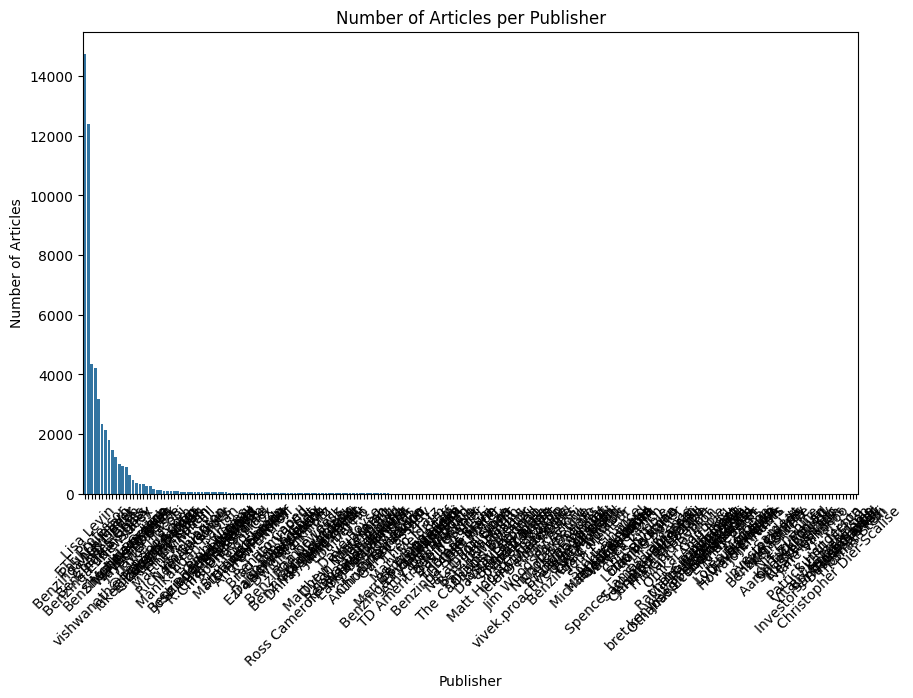

In [95]:
# Plot the article count per publisher
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


Daily Article Counts:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64


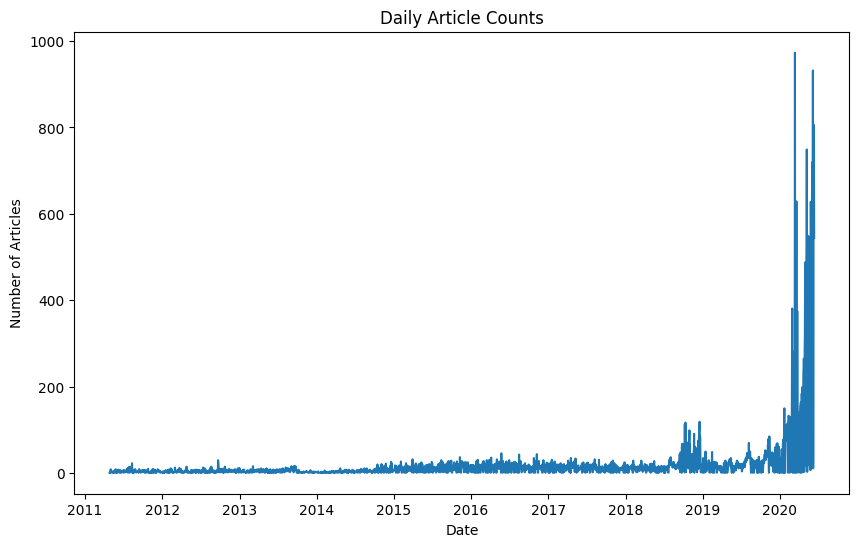

In [ ]:

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if the conversion was successful and drop rows where conversion failed
df = df.dropna(subset=['date'])

# Group by day and count the number of articles published
daily_counts = df.groupby(df['date'].dt.date).size()

# print("df['date'].dt.date",df['date'].dt.date)

print("\nDaily Article Counts:", )
print(daily_counts)

#plot the daily article counts

plt.figure(figsize=(10,6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
# daily_counts.plot()
plt.title('Daily Article Counts')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
# plt.xticks(rotation=45)
plt.show()

# 3. Analysis of Publication Dates


Number of Articles by Day of the Week:
day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


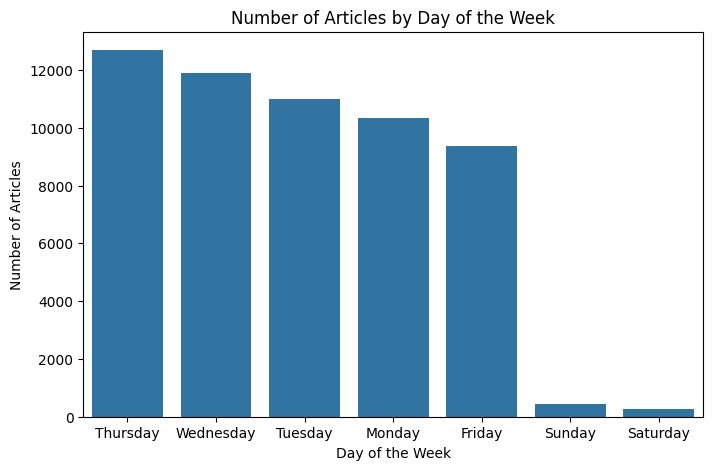

In [97]:
# Analyze trends by day of the week
df['day_of_week'] = df['date'].dt.day_name()

# print("\nDay of Week ")
# print(df['day_of_week'].head() )

day_of_week_counts = df['day_of_week'].value_counts()

print("\nNumber of Articles by Day of the Week:")
print(day_of_week_counts)


# Plot the number of articles by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()


### Text Analysis(Sentiment analysis & Topic Modeling):
 - Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.
 - Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).


In [98]:
import pandas as pd # Data manipulation and analysis
import nltk # Natural Language Toolkit for text processing
from nltk.sentiment import SentimentIntensityAnalyzer # Sentiment analysis
from nltk.corpus import stopwords # Stopwords for text processing
from wordcloud import WordCloud #for generating word clouds for the purposes of sentiment analysis
import matplotlib.pyplot as plt # Visualization library

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')


import nltk
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
print(sys.executable)

!{sys.executable} -m pip install wordcloud # Install wordcloud if not already installed

C:\Users\elsha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\elsha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [100]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_vader(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the headlines
df['Sentiment_Scores'] = df['headline'].apply(get_sentiment_vader)

# Extract compound score for simplicity
df['Sentiment'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])

# Categorize sentiment
df['Sentiment_Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Inspect the results
print(df[['headline', 'Sentiment', 'Sentiment_Category']].head())


                                            headline  Sentiment  \
0            Stocks That Hit 52-Week Highs On Friday      0.000   
1         Stocks That Hit 52-Week Highs On Wednesday      0.000   
2                      71 Biggest Movers From Friday      0.000   
3       46 Stocks Moving In Friday's Mid-Day Session      0.000   
4  B of A Securities Maintains Neutral on Agilent...      0.296   

  Sentiment_Category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4           Positive  


In [101]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Keyword Extraction and Topic Modeling

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=10)

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['headline'])

# Get the feature names
feature_names = tfidf.get_feature_names_out()

# Sum the TF-IDF scores for each feature over all documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Extract keywords with their scores
keywords = [(feature_names[i], sum_tfidf[0, i]) for i in range(len(feature_names))]

# Sort keywords by their scores in descending order
keywords = sorted(keywords, key=lambda x: x[1], reverse=True)

# Display the keywords
keywords


ModuleNotFoundError: No module named 'sklearn'

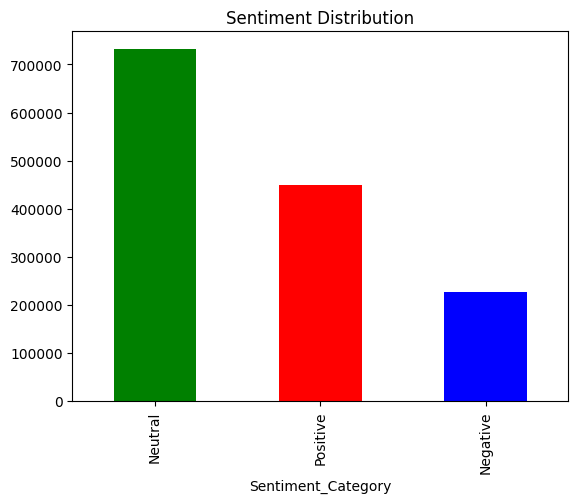

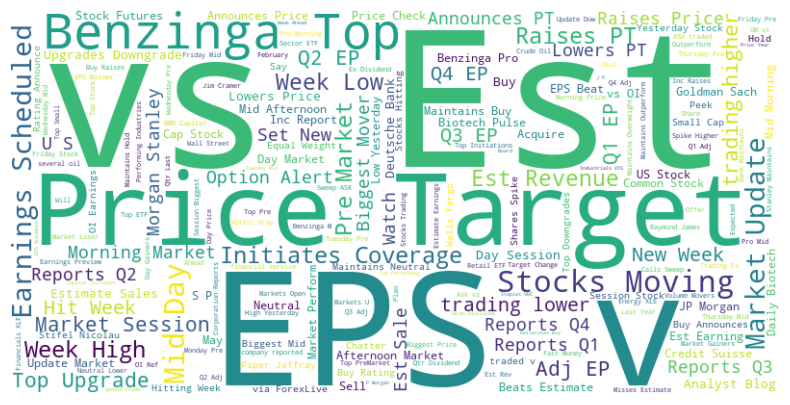

In [ ]:
# Sentiment distribution plot
df['Sentiment_Category'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()

# Word Cloud for all tokens
all_words = ' '.join(df['headline']).split()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Time Series Analysis:
- How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
- Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.


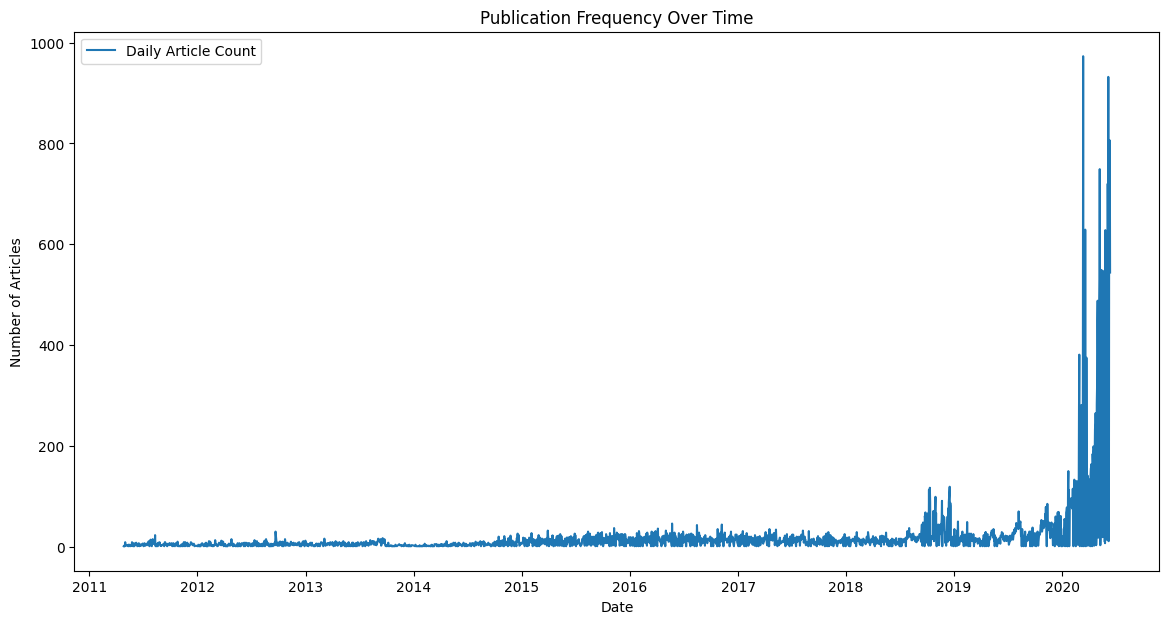

In [ ]:
# Plot publication frequency over time
plt.figure(figsize=(14, 7))
plt.plot(daily_counts, label='Daily Article Count')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

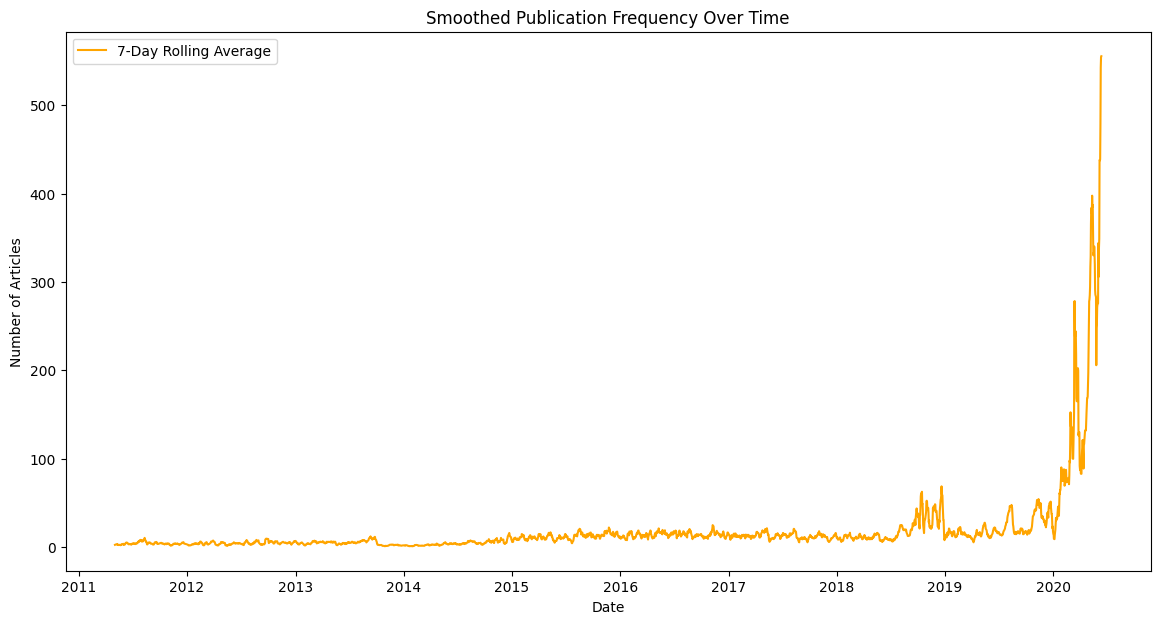

In [ ]:
# Apply a rolling average (e.g., 7 days) to smooth the data
rolling_avg = daily_counts.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(rolling_avg, label='7-Day Rolling Average', color='orange')
plt.title('Smoothed Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

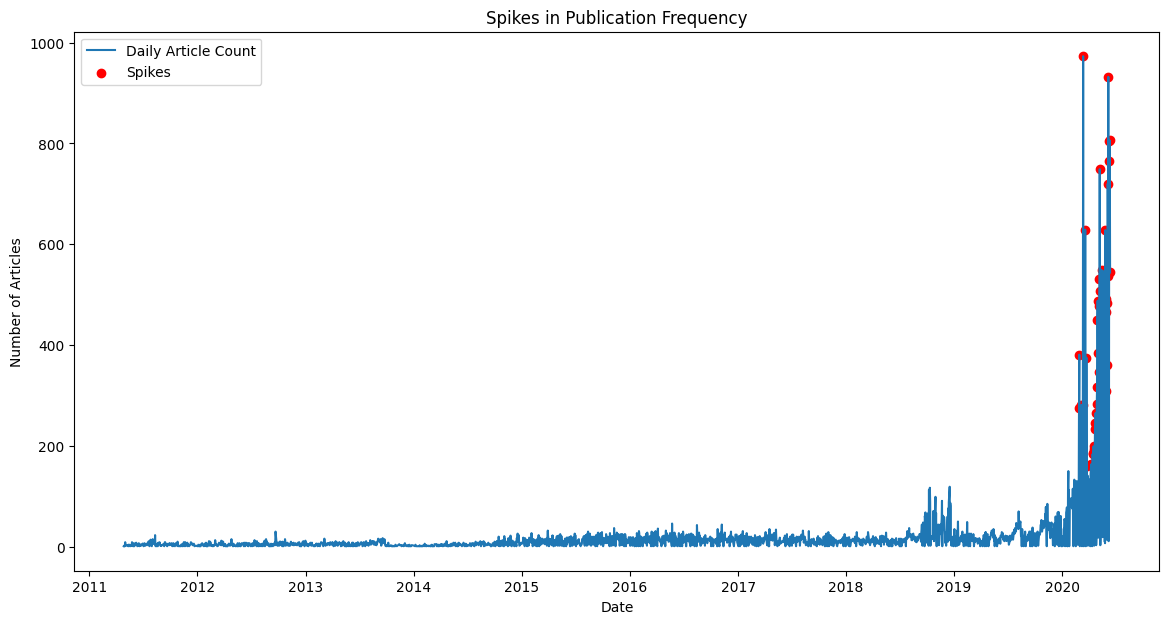

In [ ]:
# Identify spikes using a threshold
threshold = daily_counts.mean() + 2*daily_counts.std()  # Example threshold
spikes = daily_counts[daily_counts > threshold]

plt.figure(figsize=(14, 7))
plt.plot(daily_counts, label='Daily Article Count')
plt.scatter(spikes.index, spikes.values, color='red', label='Spikes')
plt.title('Spikes in Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

C:\Users\Coop\AppData\Local\Temp\ipykernel_9444\75500051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour


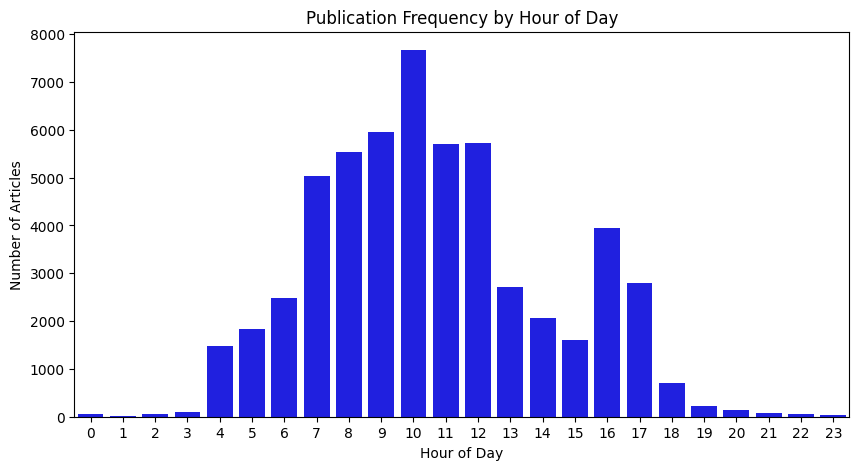

In [ ]:
# Analyze hourly distribution of publications
df['hour'] = df['date'].dt.hour
hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='blue')
plt.title('Publication Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()

C:\Users\Coop\AppData\Local\Temp\ipykernel_9444\1795992580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['date'].dt.day_name()


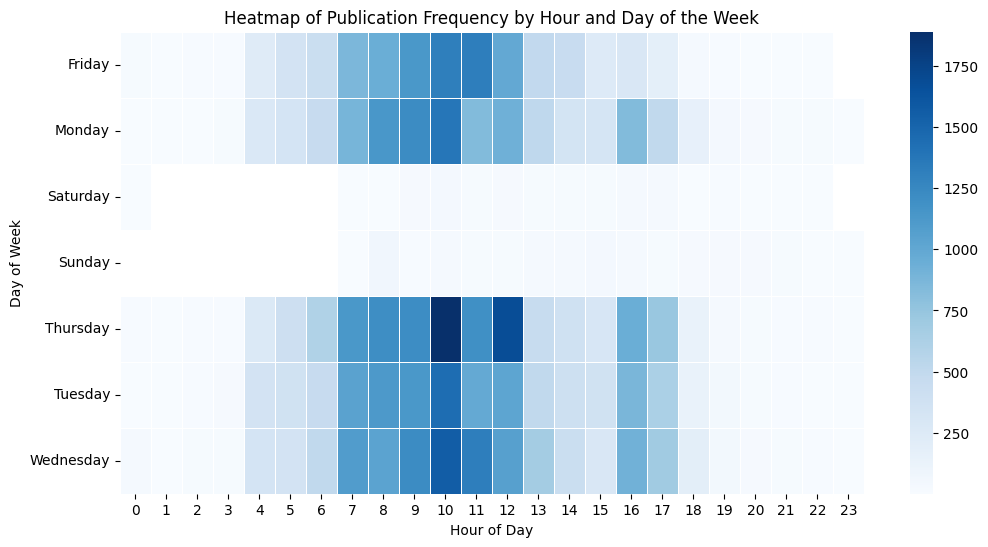

In [ ]:
# Heatmap of hourly distribution by day of the week
df['day_of_week'] = df['date'].dt.day_name()
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=.5, annot=False)
plt.title('Heatmap of Publication Frequency by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


## Publisher Analysis:
 - Which publishers contribute most to the news feed? 
 - Is there a difference in the type of news they report?
 - If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.


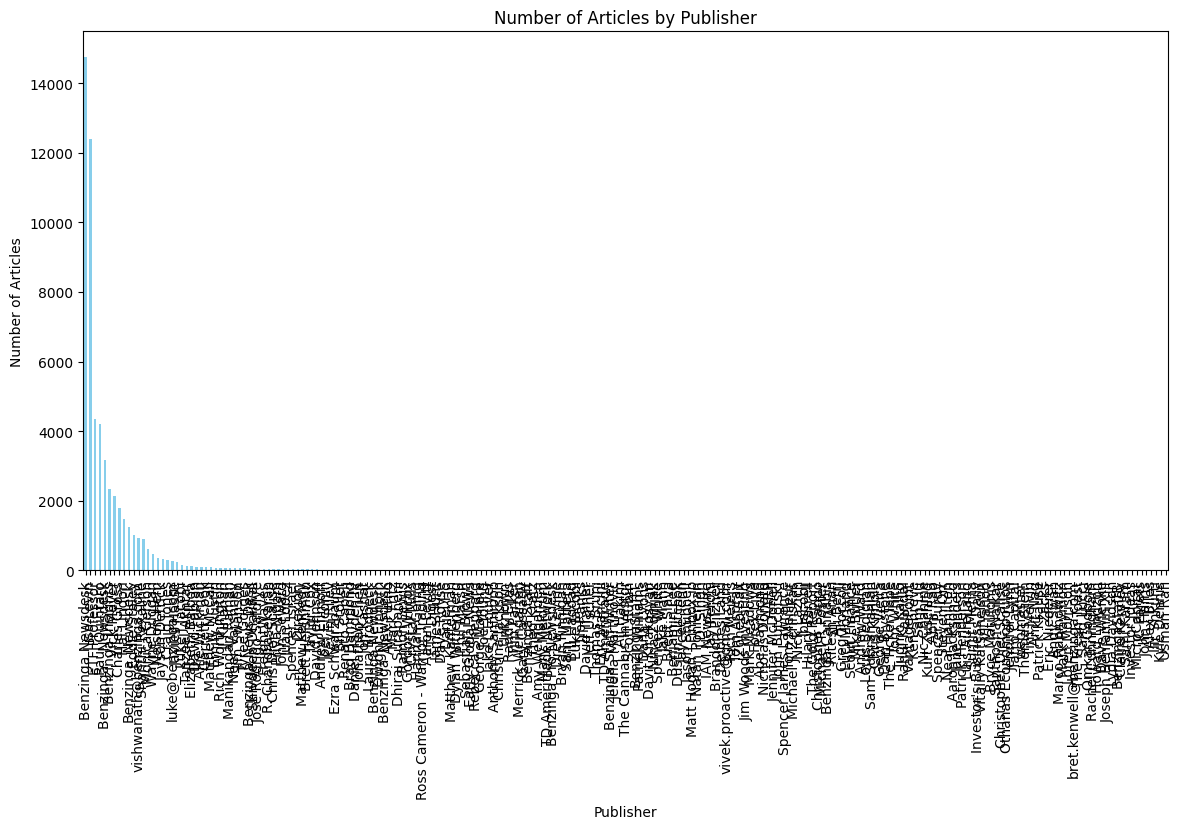

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('raw_analyst_ratings.csv')

# Count the number of articles contributed by each publisher
publisher_counts = df['publisher'].value_counts()

# Plot the number of articles contributed by each publisher
plt.figure(figsize=(14, 7))
publisher_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'Sentiment_Scores', 'Sentiment', 'Sentiment_Category', 'sentiment',
       'hour', 'day_of_week'],
      dtype='object')


<Figure size 1400x700 with 0 Axes>

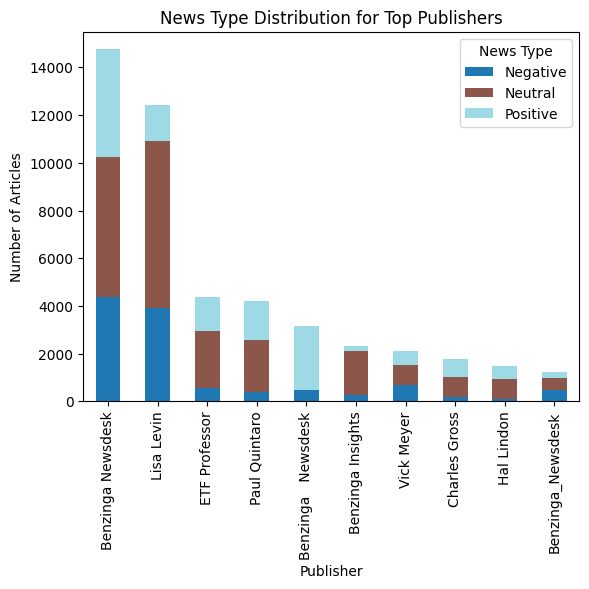

In [ ]:
# Is There a Difference in the Type of News Reported by Each Publisher?
# Example column 'type' for type of news
# Group by publisher and type of news to see the distribution
publisher_news_types = df.groupby('publisher')['Sentiment_Category'].value_counts().unstack().fillna(0)

# Plot the distribution of news types for top publishers
top_publishers = publisher_counts.head(10).index
filtered_data = publisher_news_types.loc[top_publishers]

plt.figure(figsize=(14, 7))
filtered_data.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('News Type Distribution for Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.legend(title='News Type')
plt.show()


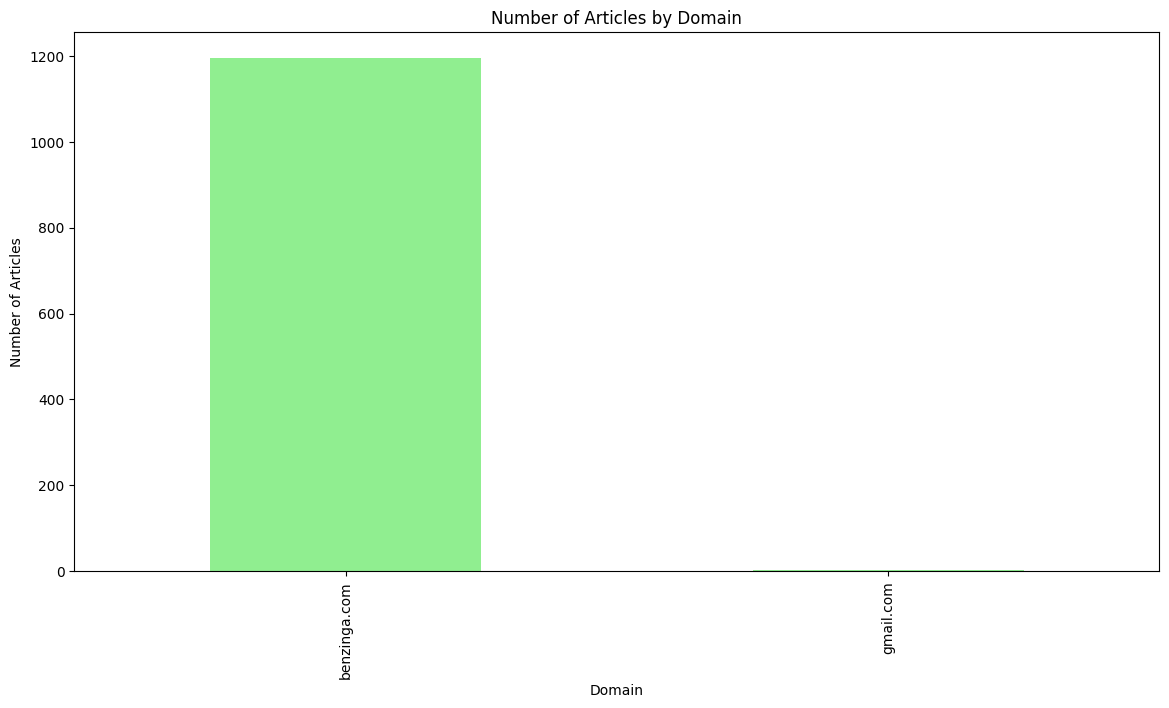

In [ ]:
# Extract domains from email addresses
df['domain'] = df['publisher'].str.split('@').str[1]

# Count the number of articles contributed by each domain
domain_counts = df['domain'].value_counts()

# Plot the number of articles contributed by each domain
plt.figure(figsize=(14, 7))
domain_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Articles by Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()
